1. 

In [6]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import pystan
import stan_utility
import psis

## Dataset

In [27]:
raw_data = np.loadtxt('data.txt')

mat = np.zeros(shape=(23, 6))
values = np.arange(46,0,-1)

for v in values:
    for c in range(0, 6):
        for r in range(0, 23):
            if (c+r) == (46-v):
                mat[r][c] = v
                
tournament_result = []
for i in raw_data:
    r = int(i[0] + 11 - 1)
    c = int(i[1] - 1)
    tournament_result.append(mat[r][c])
    
print(tournament_result)
print(min(tournament_result))
print(max(tournament_result))

[22.0, 31.0, 31.0, 25.0, 38.0, 42.0, 22.0, 24.0, 33.0, 26.0, 40.0, 40.0, 42.0, 46.0, 29.0, 40.0, 22.0, 31.0, 32.0, 25.0, 31.0, 44.0, 40.0, 31.0, 22.0, 37.0, 44.0, 27.0, 21.0, 27.0, 28.0, 21.0, 30.0, 23.0, 31.0, 41.0, 31.0, 41.0, 46.0, 20.0, 23.0, 28.0, 35.0, 30.0, 32.0, 25.0, 32.0, 26.0, 31.0, 31.0, 31.0, 41.0, 35.0, 45.0, 41.0, 31.0, 32.0, 45.0, 26.0, 46.0, 36.0, 20.0, 26.0, 31.0, 29.0, 42.0, 45.0, 35.0, 41.0, 25.0, 32.0, 36.0, 31.0, 22.0, 30.0, 20.0, 20.0, 25.0, 24.0, 27.0, 40.0, 44.0, 43.0, 44.0, 26.0, 26.0, 36.0, 35.0, 31.0, 38.0, 27.0, 20.0, 25.0, 22.0, 31.0, 43.0, 42.0, 40.0, 32.0, 30.0, 25.0, 32.0, 28.0, 25.0, 30.0, 37.0, 24.0, 31.0, 23.0, 25.0, 33.0, 43.0, 40.0, 46.0, 31.0, 29.0, 45.0, 42.0, 44.0, 37.0, 33.0, 25.0, 27.0, 31.0, 32.0, 42.0, 45.0, 41.0, 46.0, 42.0, 32.0, 34.0, 38.0, 25.0, 31.0, 35.0, 25.0, 26.0, 22.0, 26.0, 38.0, 44.0, 31.0, 33.0, 38.0, 32.0, 37.0, 32.0, 41.0, 29.0, 28.0, 20.0, 25.0, 23.0, 27.0, 41.0, 45.0, 38.0, 46.0, 26.0, 32.0, 37.0, 41.0, 27.0, 28.0, 33.0, 22.

In [5]:
# Read data and convert it to matrix with dimensions [6x23]
raw_data = pd.read_csv('data.txt', sep=" ", header=None)
raw_data.columns = ['spread','win']
raw_data = raw_data.groupby(['spread', 'win']).size().reset_index(name='counts')


data_json = {i: [0 for j in range(-11,12)] for i in range(1,7)}
for index, row in raw_data.iterrows():
    data_json[row['win']][11+row['spread']] = row['counts']

data = pd.DataFrame(data=data_json)
j=-11
c = {}
for i in range(0,23):
    c[i] = j
    j += 1

data.rename(index=c, inplace=True)
data = data.T
np_data = data.values




In [4]:
# Data #######
raw_data = pd.read_csv('kristel.txt', sep=" ", header=None)
print(raw_data)


highest_frequency = max([8,8,7,7,6,6,5,5,4,3,2])+2
#data = dict(N=11, n=[highest_frequency for i in range(0,11)], 
#            y=np.array(list(reversed([8,8,7,7,6,6,5,5,4,3,2]))), x=[1,2,3,4,5,6,7,8,9,10,11])
data = dict(r=23, c=3, y=data_matrix)

def fit_model(model_code='stan_code\\binom-logistic-regression.stan'):
    model = stan_utility.compile_model(model_code)
    fit = model.sampling(data=data, seed=194838, chains=4, iter=4000)
    samples = fit.extract(permuted=True)
    print(fit)
    stan_utility.check_treedepth(fit)
    stan_utility.check_energy(fit)
    stan_utility.check_div(fit)
    return samples

FileNotFoundError: File b'kristel.txt' does not exist

In [4]:
# Models
with open('stan_code\\binom-logistic-regression.stan') as file:
    print(file.read())

// Binomial model with linear fit prior
data {
  int<lower=0> N;
  int n[N];  //Number of trials per spread
  row_vector[N] x; //Spreads
  int y[N];  //Number of successes per spread
}
parameters {
  real alpha; 
  real beta; 
}
transformed parameters {
  row_vector[N] p;
  p=inv_logit(alpha + beta*x);
}
model {
  y ~ binomial(n,p); //Note! Probabilities should be constrained to lie between 0 and 1.
}
generated quantities {
 vector[N] y_rep;
 for(i in 1:N){
  y_rep[i] <- binomial_rng(n[i],p[i]); //posterior draws to get posterior predictive checks
 }
}


In [6]:
# logistic_samples = fit_model('stan_code\\binom-logistic-regression.stan')

In [34]:
logistic_samples = fit_model('stan_code\\multinomial.stan')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_64050bdb4345f8556d8cea2a5498a672 NOW.
C:\Users\phuct\Miniconda3\envs\stan\lib\site-packages\Cython\Compiler\Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\phuct\AppData\Local\Temp\tmp73xard5o\stanfit4anon_model_64050bdb4345f8556d8cea2a5498a672_4005347848322932037.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


Inference for Stan model: anon_model_64050bdb4345f8556d8cea2a5498a672.
4 chains, each with iter=4000; warmup=2000; thin=1; 
post-warmup draws per chain=2000, total post-warmup draws=8000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
theta[1]   0.34  3.0e-3   0.24   0.01   0.13    0.3   0.51   0.85   6501    1.0
theta[2]   0.33  2.8e-3   0.23   0.01   0.13   0.29   0.49   0.83   6903    1.0
theta[3]   0.33  3.1e-3   0.24   0.01   0.13   0.29    0.5   0.85   5906    1.0
lp__       -4.5    0.02   1.15  -7.65  -4.99  -4.15  -3.66  -3.33   3026    1.0

Samples were drawn using NUTS at Thu Nov 29 14:00:15 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
0 of 8000 iterations saturated the maximum tree depth of 10 (0.0%)
0.0 of 8000 iterations ended with a divergence (0.0%)


In [9]:
####### Multinomial #######






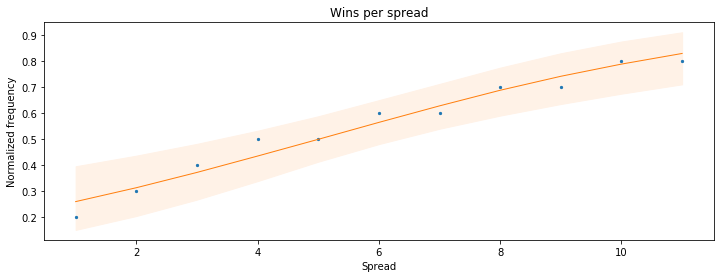

In [16]:
def show_model_fit(x, y, mu):    
    figsize = plt.rcParams['figure.figsize'].copy()
    figsize[0] *= 2  # width
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # scatterplot and lines
    color_scatter = 'C0'  # 'C0' for default color #0
    color_line = 'C1'     # 'C1' for default color #1
    # lighten color_line
    color_shade = (1 - 0.1*(1 - np.array(mpl.colors.to_rgb(color_line))))
    # plot
    ax.fill_between(
        x,
        np.percentile(mu, 5, axis=0),
        np.percentile(mu, 95, axis=0),
        color=color_shade
    )
    ax.plot(
        x,
        np.percentile(mu, 50, axis=0),
        color=color_line,
        linewidth=1
    )
    ax.scatter(x, y, 5, color=color_scatter)
    ax.set_xlabel('Spread')
    ax.set_ylabel('Normalized frequency')
    ax.set_title('Wins per spread')
    plt.show()
    
show_model_fit(data["x"],data["y"]/np.array([highest_frequency]), logistic_samples['p'])

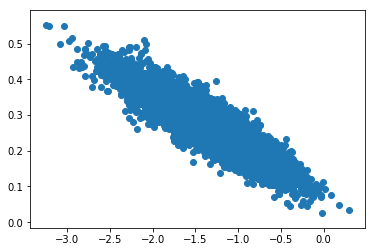

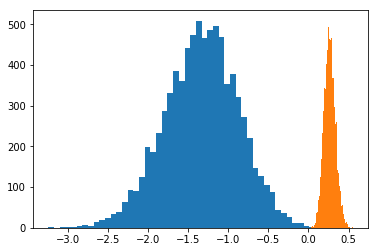

'plt.scatter(data["x"],data["y"]/np.array([highest_frequency]))\ndef calc(a,b,xp):\n    return np.exp(a + b*xp)/(1 + np.exp(a + b*xp))'

In [17]:
"""from scipy import stats
for i in range(0,11):
    mu = np.mean(logistic_samples['y_rep'][:,i])
    std = np.std(logistic_samples['y_rep'][:,i])
    x = np.linspace(0,11,100)
    plt.plot(x, stats.norm(mu,std).pdf(x))
    #plt.hist(logistic_samples['y_rep'][:,i], alpha=0.2, density=True)
plt.show()
"""


plt.scatter(logistic_samples["alpha"],logistic_samples["beta"])
plt.show();
plt.hist(logistic_samples["alpha"], bins=50)
plt.hist(logistic_samples["beta"], bins=50)
plt.show();

"""plt.scatter(data["x"],data["y"]/np.array([highest_frequency]))
def calc(a,b,xp):
    return np.exp(a + b*xp)/(1 + np.exp(a + b*xp))"""